In [6]:
import pandas as pd 
import numpy as np
import logging
import os

# Set up logging
logging.basicConfig(level=logging.INFO)

# Define file paths
file_paths = {
    'train': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/train.csv',
    'test': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/test.csv',
    'store': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/store.csv'
}

# Check if all files exist
for file_name, file_path in file_paths.items():
    if not os.path.exists(file_path):
        logging.error(f"File not found: {file_name} at {file_path}")
    else:
        logging.info(f"File found: {file_name} at {file_path}")

# Load the training dataset (train.csv)
try:
    df = pd.read_csv(file_paths['train'])
    logging.info("Training dataset loaded successfully.")
except Exception as e:
    logging.error(f"Error loading training dataset: {e}")

# Check for missing values
logging.info(f"Missing values:\n{df.isnull().sum()}")

# Check for data types
logging.info(f"Data Types:\n{df.dtypes}")

# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Handle missing values in numeric columns (fill with median)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Handle missing values in non-numeric columns (fill with mode for categorical variables)
for col in non_numeric_columns:
    if df[col].dtype == 'object':  # If the column is a string/object type
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode for categorical variables
    else:
        # If it's a datetime or another type, handle accordingly
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime if needed, invalid parsing will become NaT
        df[col].fillna(df[col].mode()[0], inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Log basic information about the data
logging.info(f"Shape of data: {df.shape}")


INFO:root:File found: train at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/train.csv
INFO:root:File found: test at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/test.csv
INFO:root:File found: store at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/store.csv
C:\Users\user\AppData\Local\Temp\ipykernel_17168\4061312228.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_paths['train'])
INFO:root:Training dataset loaded successfully.
INFO:root:Missing values:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
INFO:root:Data Types:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHo

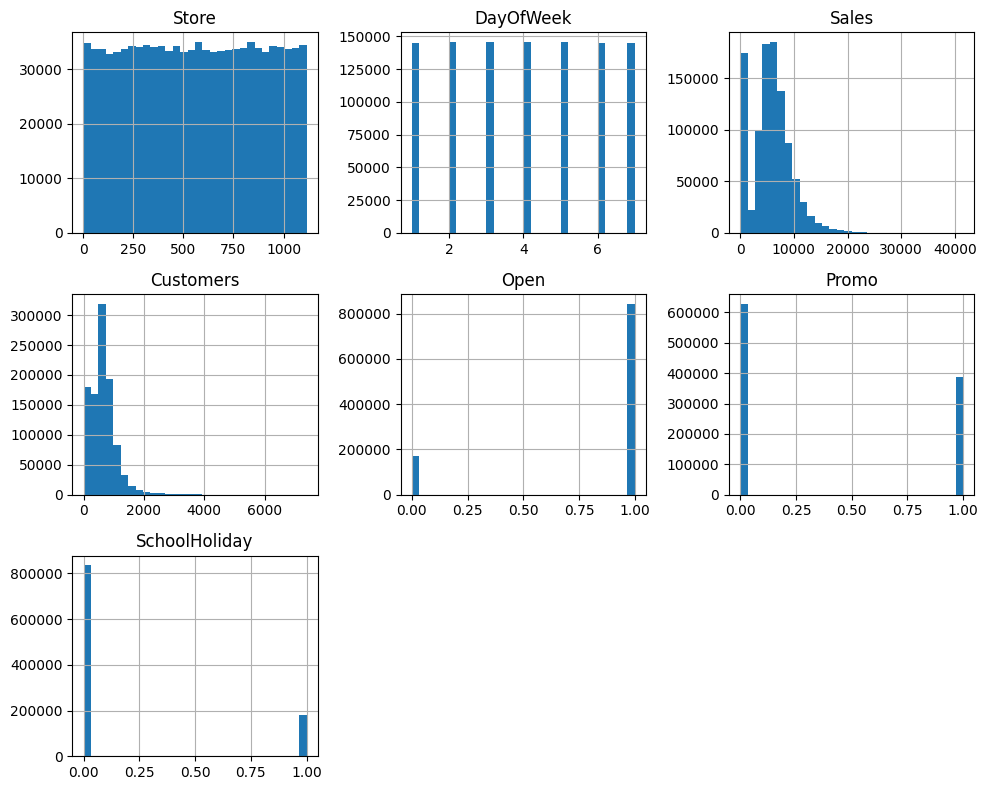

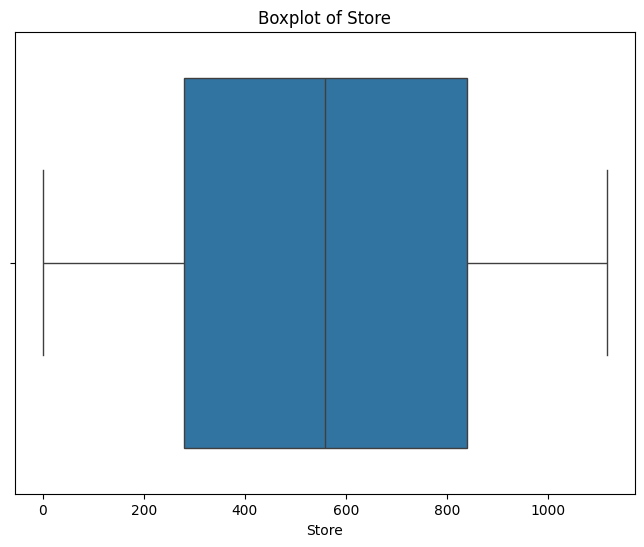

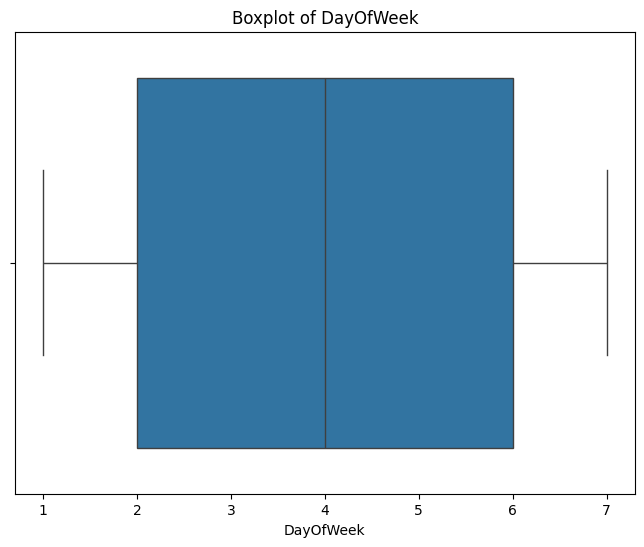

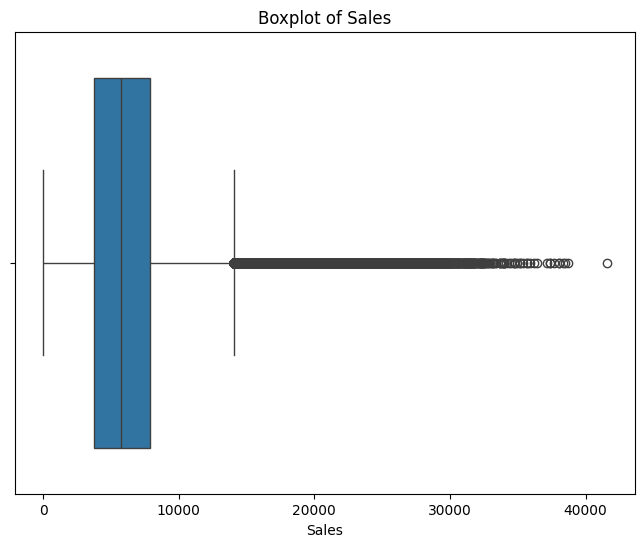

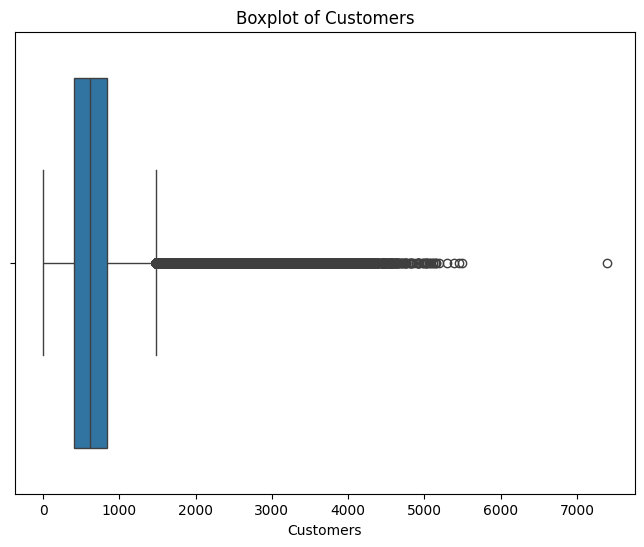

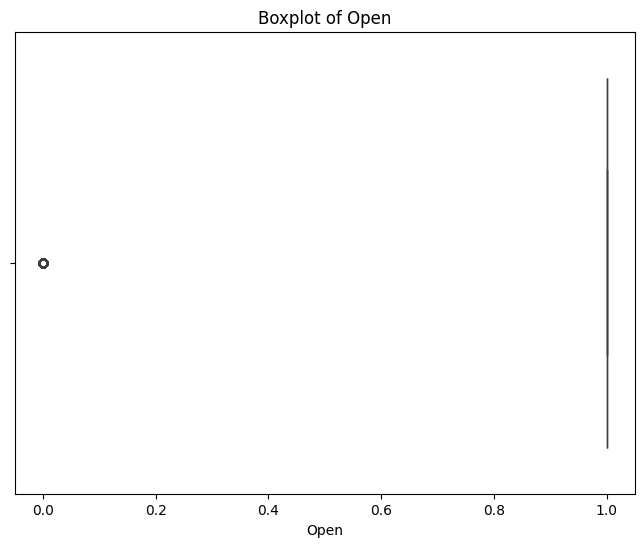

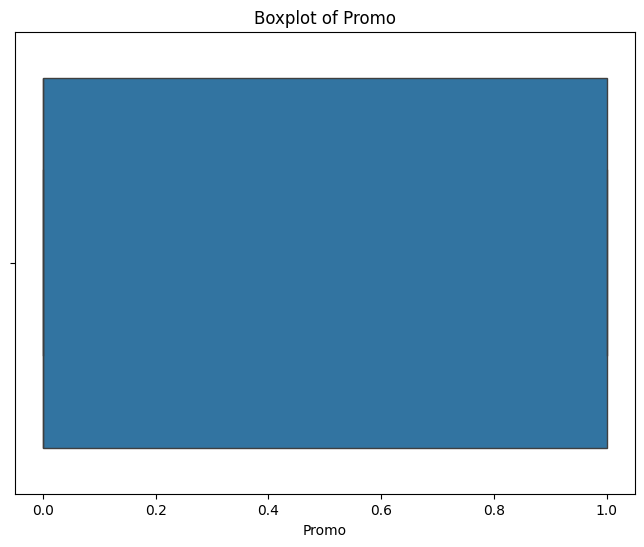

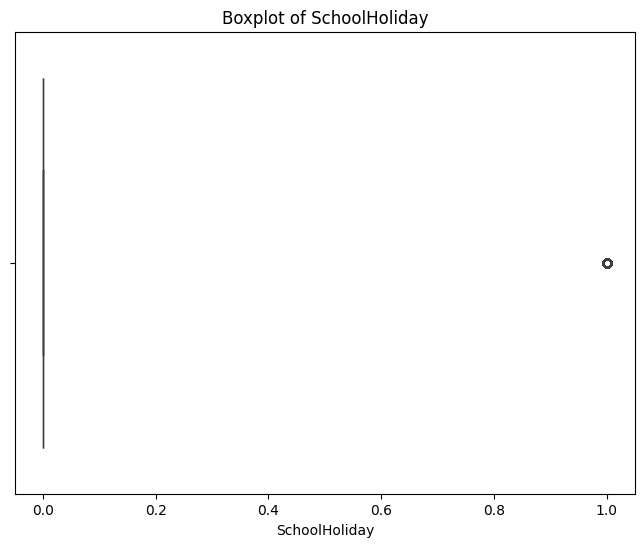

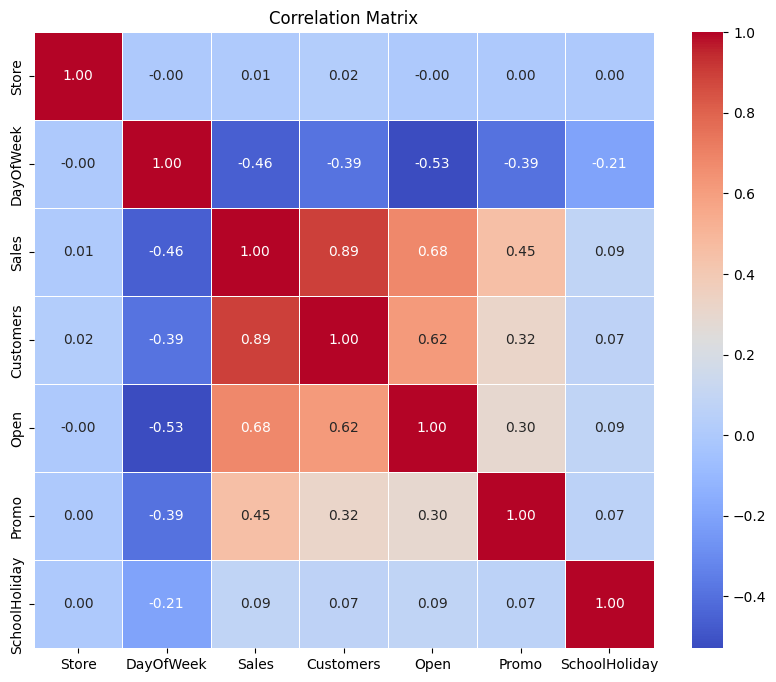

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

# Boxplot to visualize outliers in each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation matrix to check relationships between numeric features
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Assuming there is a 'date' column
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime if not already
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.weekday  # 0: Monday, 6: Sunday
    df['quarter'] = df['date'].dt.quarter
    logging.info(f"Date features added: {['year', 'month', 'day', 'day_of_week', 'quarter']}")


In [9]:
# Aggregating total sales by store
if 'store_id' in df.columns and 'sales' in df.columns:
    store_sales = df.groupby('store_id')['sales'].sum().reset_index()
    store_sales.columns = ['store_id', 'total_sales']
    df = df.merge(store_sales, on='store_id', how='left')

logging.info(f"Aggregated total sales by store.")


INFO:root:Aggregated total sales by store.


In [10]:
# One-hot encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

logging.info(f"Categorical columns encoded with one-hot encoding: {categorical_columns}")


INFO:root:Categorical columns encoded with one-hot encoding: Index(['Date', 'StateHoliday'], dtype='object')


In [12]:
# Check the column names in the dataset
logging.info(f"Column names in the dataset: {df.columns}")


INFO:root:Column names in the dataset: Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Date_2013-01-02', 'Date_2013-01-03',
       'Date_2013-01-04',
       ...
       'Date_2015-07-26', 'Date_2015-07-27', 'Date_2015-07-28',
       'Date_2015-07-29', 'Date_2015-07-30', 'Date_2015-07-31',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object', length=952)


In [13]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop(columns=['Sales'])  # Use 'Sales' with the correct capitalization
y = df['Sales']  # Use 'Sales' with the correct capitalization

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logging.info(f"Train and test sets split: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


INFO:root:Train and test sets split: X_train shape: (813767, 951), X_test shape: (203442, 951)


In [15]:
import pandas as pd 
import numpy as np
import logging
import os

# Set up logging
logging.basicConfig(level=logging.INFO)

# Define file paths
file_paths = {
    'train': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/train.csv',
    'test': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/test.csv',
    'store': 'C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/store.csv'
}

# Check if all files exist
for file_name, file_path in file_paths.items():
    if not os.path.exists(file_path):
        logging.error(f"File not found: {file_name} at {file_path}")
    else:
        logging.info(f"File found: {file_name} at {file_path}")

# Load the training dataset (train.csv)
try:
    df = pd.read_csv(file_paths['train'])
    logging.info("Training dataset loaded successfully.")
except Exception as e:
    logging.error(f"Error loading training dataset: {e}")

# Check for missing values
logging.info(f"Missing values:\n{df.isnull().sum()}")

# Check for data types
logging.info(f"Data Types:\n{df.dtypes}")

# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Handle missing values in numeric columns (fill with median)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Handle missing values in non-numeric columns (fill with mode or drop them)
for col in non_numeric_columns:
    if df[col].dtype == 'object':  # Check if the column is a string/object type
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode for categorical variables
    else:
        # If it's a datetime or another type, handle accordingly
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime if needed, invalid parsing will become NaT
        df[col].fillna(df[col].mode()[0], inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Log basic information about the data
logging.info(f"Shape of data: {df.shape}")


INFO:root:File found: train at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/train.csv


INFO:root:File found: test at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/test.csv
INFO:root:File found: store at C:/Users/user/Desktop/10 Academy W4/Data - rossmann-store-sales/store.csv
C:\Users\user\AppData\Local\Temp\ipykernel_17168\42189036.py:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_paths['train'])
INFO:root:Training dataset loaded successfully.
INFO:root:Missing values:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
INFO:root:Data Types:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
C:\Users\user\AppData\Local\Temp\ipykernel_17168\42189036.py:46: FutureWarnin

In [21]:
# Check the columns of the test dataset
test_df = pd.read_csv(test_path, low_memory=False)
print(test_df.columns)  # This will print the columns in your test dataset


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [23]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# File paths
train_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\train.csv"
test_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\test.csv"
model_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\trained_model.pkl"

# Step 1: Load the training data
train_df = pd.read_csv(train_path, low_memory=False)

# Step 2: Handle missing values
train_df.ffill(inplace=True)  # Using ffill() instead of fillna(method='ffill')

# Step 3: Handle categorical data (e.g., StateHoliday) - Encoding categorical variables
label_encoder = LabelEncoder()

# Encoding 'StateHoliday' and 'SchoolHoliday' columns, assuming they are categorical
train_df['StateHoliday'] = label_encoder.fit_transform(train_df['StateHoliday'].astype(str))
train_df['SchoolHoliday'] = label_encoder.fit_transform(train_df['SchoolHoliday'].astype(str))

# Step 4: Model Setup
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))  # Enable parallel processing
])

# Step 5: Feature Engineering
X_train = train_df[['Store', 'Promo', 'StateHoliday', 'SchoolHoliday']]  # Features used for training
y_train = train_df['Sales']  # Target column

# Step 6: Training the Model
model.fit(X_train, y_train)

# Step 7: Save the trained model (serialization)
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print("Model training and serialization completed successfully!")


Model training and serialization completed successfully!


In [26]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# File paths
train_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\train.csv"
test_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\test.csv"
model_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\trained_model.pkl"

# Step 1: Load the training data
train_df = pd.read_csv(train_path, low_memory=False)

# Step 2: Handle missing values
train_df.ffill(inplace=True)  # Using ffill() instead of fillna(method='ffill')

# Step 3: Handle categorical data (e.g., StateHoliday) - Encoding categorical variables
label_encoder = LabelEncoder()

# Encoding 'StateHoliday' and 'SchoolHoliday' columns, assuming they are categorical
train_df['StateHoliday'] = label_encoder.fit_transform(train_df['StateHoliday'].astype(str))
train_df['SchoolHoliday'] = label_encoder.fit_transform(train_df['SchoolHoliday'].astype(str))

# Step 4: Model Setup
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))  # Enable parallel processing
])

# Step 5: Feature Engineering
X_train = train_df[['Store', 'Promo', 'StateHoliday', 'SchoolHoliday']]  # Features used for training
y_train = train_df['Sales']  # Target column

# Step 6: Training the Model
model.fit(X_train, y_train)

# Step 7: Save the trained model (serialization)
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print("Model training and serialization completed successfully!")

# Predicting with the Test Data

# Load the trained model
with open(model_path, 'rb') as f:
    trained_model = pickle.load(f)

# Step 1: Load the test data
test_df = pd.read_csv(test_path, low_memory=False)

# Step 2: Handle missing values in the test data
test_df.ffill(inplace=True)

# Step 3: Handle categorical data in the test data
# Encoding 'StateHoliday' and 'SchoolHoliday' columns
test_df['StateHoliday'] = test_df['StateHoliday'].astype(str)
test_df['SchoolHoliday'] = test_df['SchoolHoliday'].astype(str)

# Manually handle unseen labels by applying the same label encoding for known categories only
test_df['StateHoliday'] = test_df['StateHoliday'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)
test_df['SchoolHoliday'] = test_df['SchoolHoliday'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Step 4: Use the same features for prediction
X_test = test_df[['Store', 'Promo', 'StateHoliday', 'SchoolHoliday']]

# Step 5: Predict using the trained model
predictions = trained_model.predict(X_test)

# Step 6: Print or save predictions
print(predictions)

# Saving predictions to CSV
test_df['PredictedSales'] = predictions
test_df[['Id', 'PredictedSales']].to_csv('predictions.csv', index=False)


Model training and serialization completed successfully!
[ 5307.99990431  8849.54371221 10249.73309452 ...  4327.40008756
 14086.07138116  4394.28139974]


In [27]:
# Step 1: Load the test data
test_df = pd.read_csv(test_path, low_memory=False)

# Step 2: Print the columns of the test dataset
print(test_df.columns)  # This will show all the columns in your test data


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [28]:
# Fill missing values in the test dataset
test_df.ffill(inplace=True)  # Forward fill missing values


In [29]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding 'StateHoliday' column in the test dataset (you need to adjust for other categorical columns as well)
label_encoder = LabelEncoder()

# Check if 'StateHoliday' exists in both train and test datasets
if 'StateHoliday' in test_df.columns:
    test_df['StateHoliday'] = label_encoder.fit_transform(test_df['StateHoliday'])


In [30]:
# Select features for prediction (same as you did with the training data)
X_test = test_df[['Store', 'Promo', 'StateHoliday', 'SchoolHoliday']]  # Update based on your actual features


In [31]:
# Load the trained model from the pickle file
with open(model_path, 'rb') as f:
    trained_model = pickle.load(f)


In [32]:
# Make predictions using the trained model
y_pred = trained_model.predict(X_test)

# Output predictions
print("Predictions: ", y_pred)


Predictions:  [ 5307.99990431  8849.54371221 10249.73309452 ...  4327.40008756
 14086.07138116  4394.28139974]


In [33]:
# Save predictions to a CSV file
test_df['PredictedSales'] = y_pred
test_df[['Id', 'PredictedSales']].to_csv(r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\predictions.csv", index=False)
print("Predictions saved to 'predictions.csv'.")


Predictions saved to 'predictions.csv'.


In [35]:
# Adding a feature for 'DayOfWeek' or 'Weekend'
test_df['Weekend'] = test_df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)


In [37]:
# Check the columns of the test dataset again to verify the column names
print(test_df.columns)


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'PredictedSales', 'Weekend'],
      dtype='object')


In [38]:
# Apply one-hot encoding only if the categorical columns are present
categorical_columns = ['StateHoliday', 'SchoolHoliday']

for col in categorical_columns:
    if col in test_df.columns:
        test_df = pd.get_dummies(test_df, columns=[col], drop_first=True)
    else:
        print(f"'{col}' column is not present in the dataset.")


In [39]:
# Check for any missing columns in the test data compared to the train data
missing_columns = set(X_train.columns) - set(test_df.columns)
if missing_columns:
    print(f"Missing columns in test data: {missing_columns}")

# Ensure the test data has the same columns as the training data, adding missing ones if necessary
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)


Missing columns in test data: {'SchoolHoliday', 'StateHoliday'}


In [41]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv(test_path, low_memory=False)

# Inspect the columns of the dataset
print(test_df.columns)


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [43]:
print(train_df.columns)  # List columns used for training


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the test dataset
test_df = pd.read_csv(test_path, low_memory=False)

# Print the unique values in the 'StateHoliday' column (or any categorical columns) to check
print(test_df['StateHoliday'].unique())

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the training data for 'StateHoliday' and transform the test data
# Assuming the model was trained on the 'StateHoliday' encoded
test_df['StateHoliday'] = encoder.fit_transform(test_df['StateHoliday'])

# Now, select the features for prediction (must match training features)
test_features = test_df[['Store', 'Promo', 'StateHoliday', 'SchoolHoliday']]

# Handle missing values (if any) by filling them with 0
test_features.fillna(0, inplace=True)

# Make the prediction using the trained model
predictions = model.predict(test_features)

# Add the predictions to the test dataset as 'PredictedSales'
test_df['PredictedSales'] = predictions

# Display the 'Id' and 'PredictedSales' for review
print(test_df[['Id', 'PredictedSales']].head())


['0' 'a']


C:\Users\user\AppData\Local\Temp\ipykernel_17168\2847619107.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features.fillna(0, inplace=True)


   Id  PredictedSales
0   1     5307.999904
1   2     8849.543712
2   3    10249.733095
3   4     7129.763296
4   5     7520.216075


In [46]:
# Assuming the test dataset has the 'Sales' column (for evaluation)
# Check if 'Sales' is present in your test dataset
if 'Sales' in test_df.columns:
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    # Evaluate the predictions
    mae = mean_absolute_error(test_df['Sales'], test_df['PredictedSales'])
    mse = mean_squared_error(test_df['Sales'], test_df['PredictedSales'])
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
else:
    print("Actual sales data is not available in the test dataset for evaluation.")


Actual sales data is not available in the test dataset for evaluation.


In [47]:
# Save the predictions to a new CSV file
output_path = r"C:\Users\user\Desktop\10 Academy W4\Data - rossmann-store-sales\predictions.csv"
test_df[['Id', 'PredictedSales']].to_csv(output_path, index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validation scores: {scores}")
print(f"Mean MAE: {scores.mean()}")


Cross-validation scores: [-1812.23883822 -1767.50692789 -1712.77828804 -1853.85205266
 -1716.92448922]
Mean MAE: -1772.6601192068642


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Save the best model
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

print("Model with best hyperparameters saved successfully!")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 